In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install unzip
!unzip "/content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet.zip" -d /content/drive/MyDrive/GlacierGuardV8
!ls /content/drive/MyDrive/GlacierGuardV8/

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unzip is already the newest version (6.0-26ubuntu3.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Archive:  /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet.zip
   creating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/
  inflating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/README.dataset.txt  
  inflating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/README.roboflow.txt  
   creating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/test/
   creating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/test/images/
  inflating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/test/images/1-2018-6_jpg.rf.91920be59e910991adb1722c648d8044.jpg  
  inflating: /content/drive/MyDrive/GlacierGuardV8/Glacier Guard.v1i.darknet/test/images/12-2022-14_jpg.rf.34dc438

In [3]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 901.3/901.3 kB 15.4 MB/s eta 0:00:00


In [16]:
from ultralytics import YOLO


In [17]:
model = YOLO('yolov8s.pt')


100%|██████████| 21.5M/21.5M [00:00<00:00, 101MB/s] 


In [20]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/GlacierGuardV8/data.yaml epochs=50 batch=16 imgsz=224 lr0=0.01 lrf=0.1 patience=20 plots=True

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/GlacierGuardV8/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_con

In [21]:
!ls /content/runs/detect/train

args.yaml					    labels.jpg	      train_batch2.jpg
events.out.tfevents.1734516401.69abe876eb5f.5938.0  train_batch0.jpg  weights
labels_correlogram.jpg				    train_batch1.jpg


In [23]:
!yolo task=detect mode=val model=/content/runs/detect/train2/weights/best.pt data=/content/drive/MyDrive/GlacierGuardV8/data.yaml


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/Glacier-Guard/Glacier Guard.v1i.darknet/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:03<00:00,  1.81s/it]
                   all         21         39      0.903      0.781      0.833      0.459
        Lake Formation          5          5      0.941          1      0.995       0.66
          Retreat Area         21         27          1      0.772      0.914      0.484
          Water Runoff          7          7      0.767      0.571      0.591      0.232
Speed: 1.2ms preprocess, 148.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/val9
💡 Learn more at https://docs.ultralytics.com/modes/val


In [24]:
!ls /content/runs/detect/val

confusion_matrix_normalized.png  P_curve.png   val_batch0_labels.jpg  val_batch1_pred.jpg
confusion_matrix.png		 PR_curve.png  val_batch0_pred.jpg
F1_curve.png			 R_curve.png   val_batch1_labels.jpg


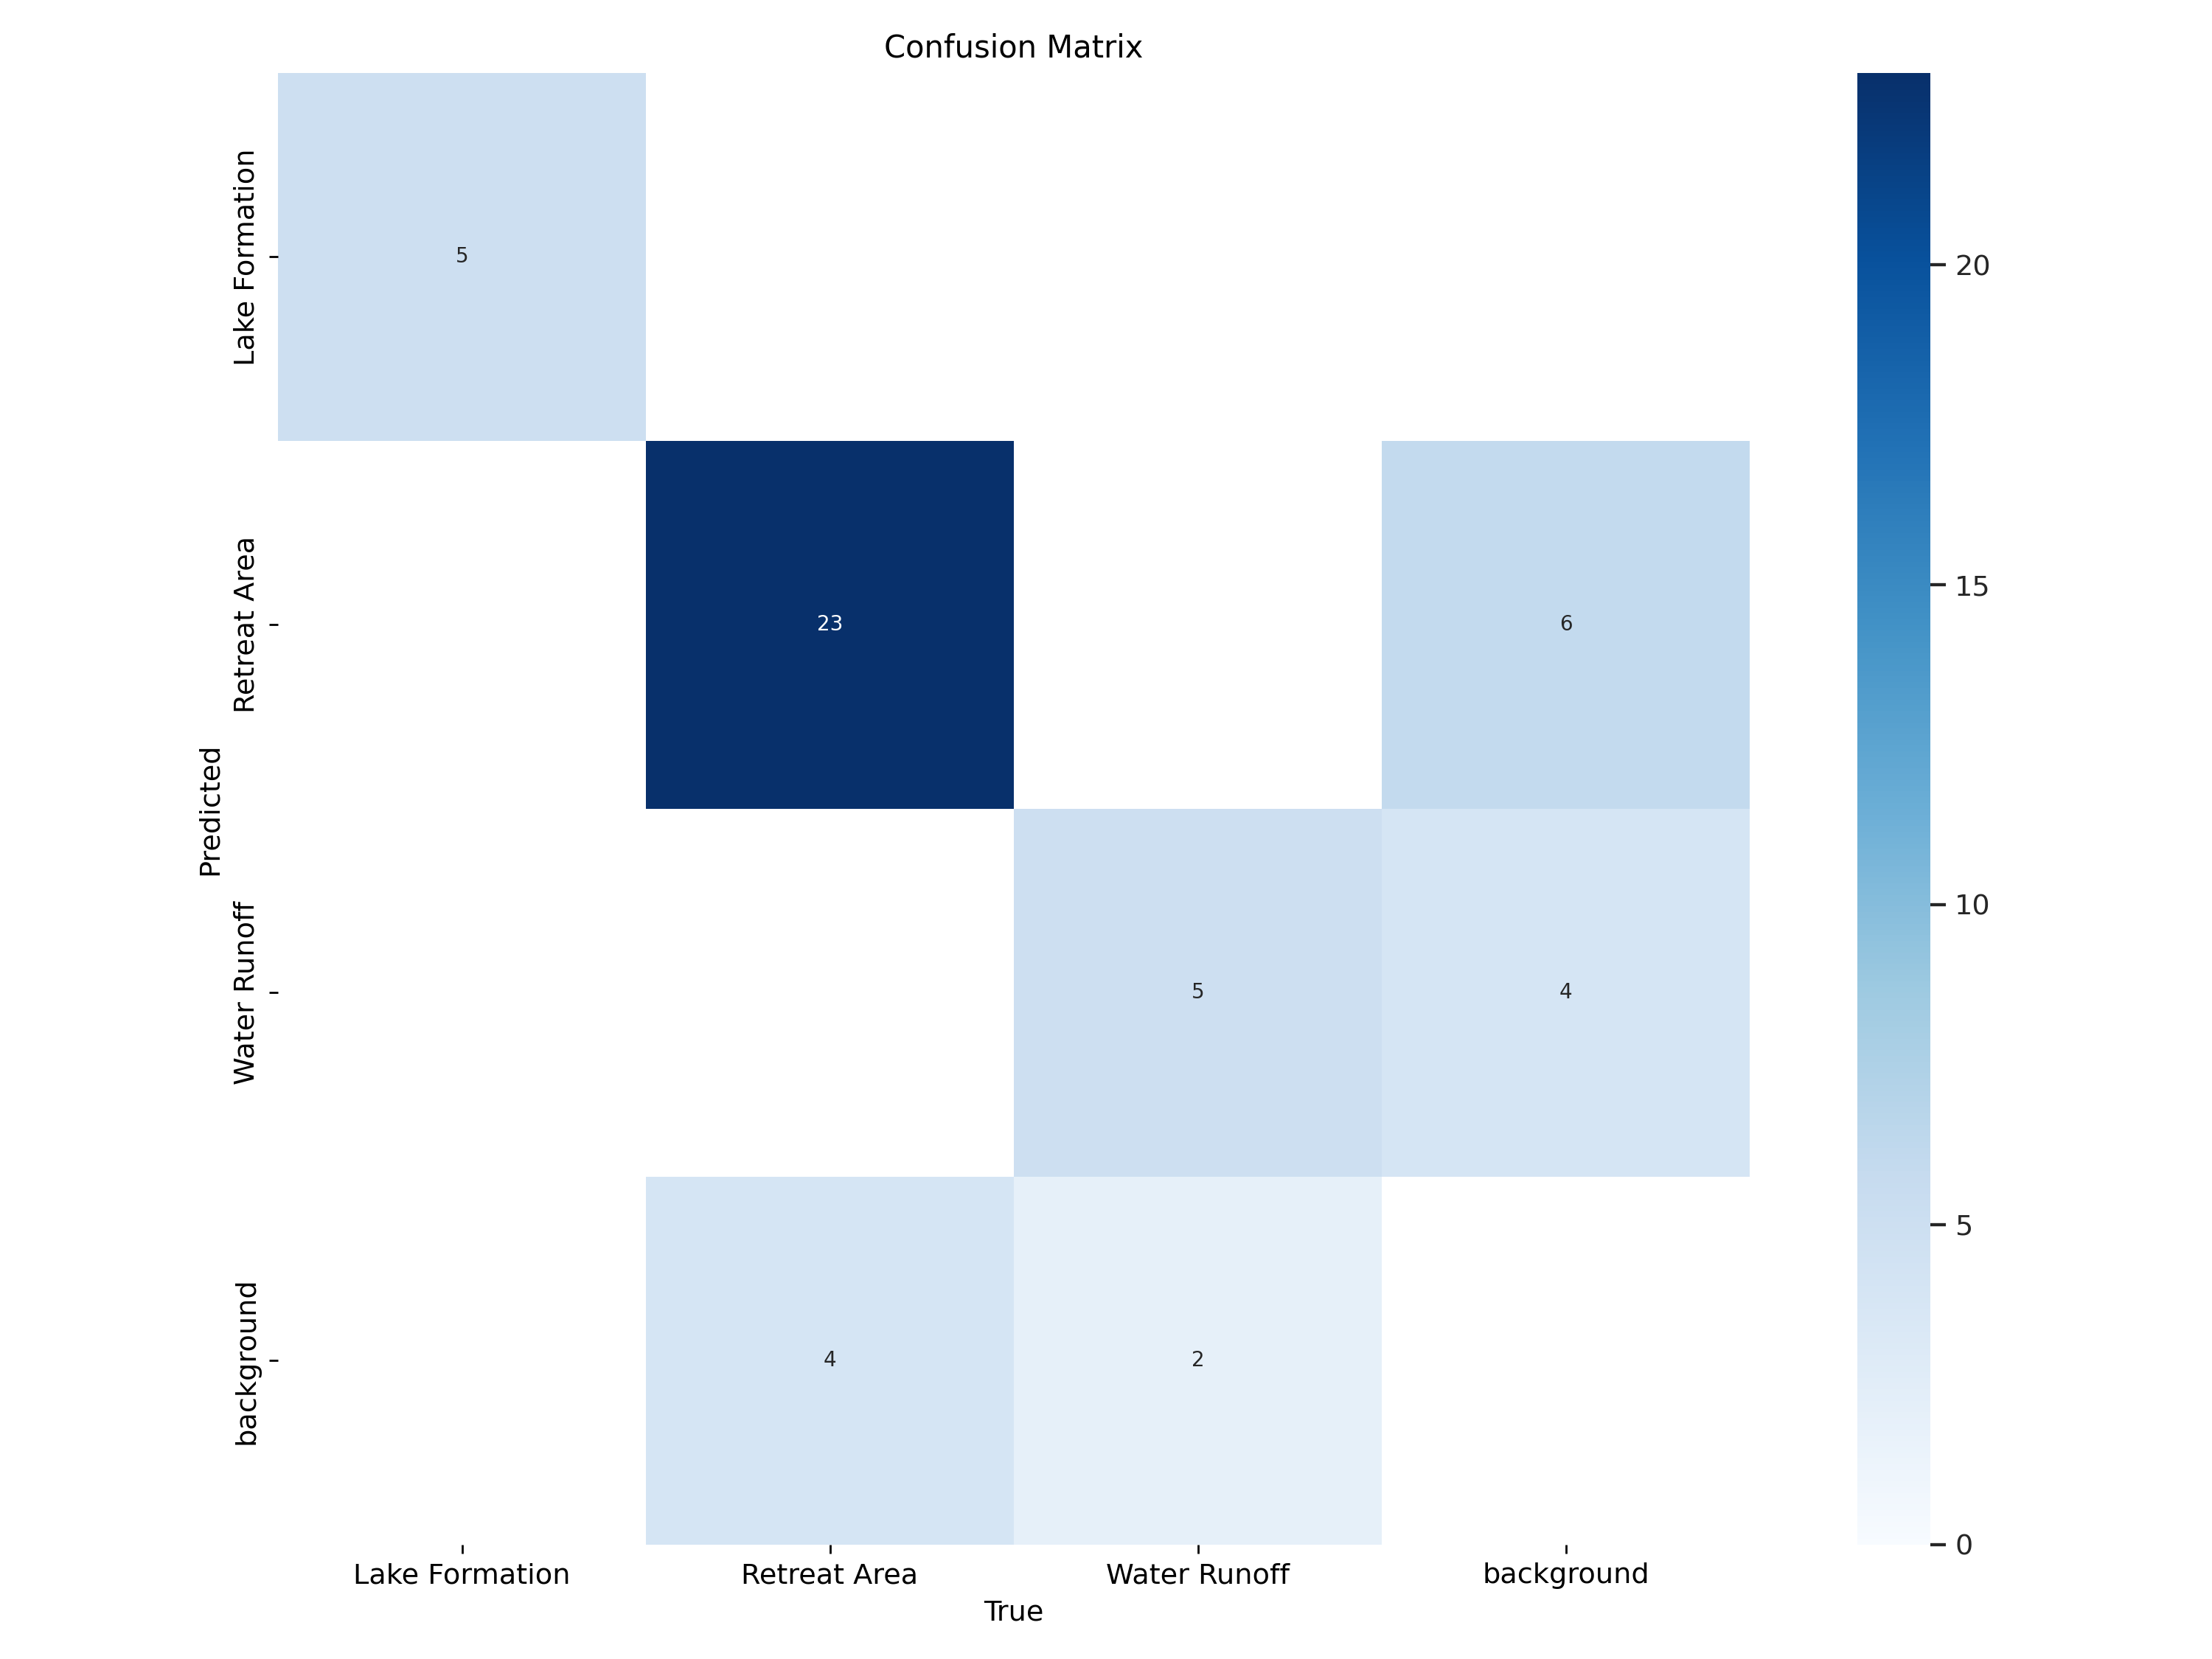

In [26]:
from IPython.display import Image, display

confusion_matrix_path = '/content/runs/detect/train2/confusion_matrix.png'  # Update this path if needed

display(Image(filename=confusion_matrix_path, width=600))


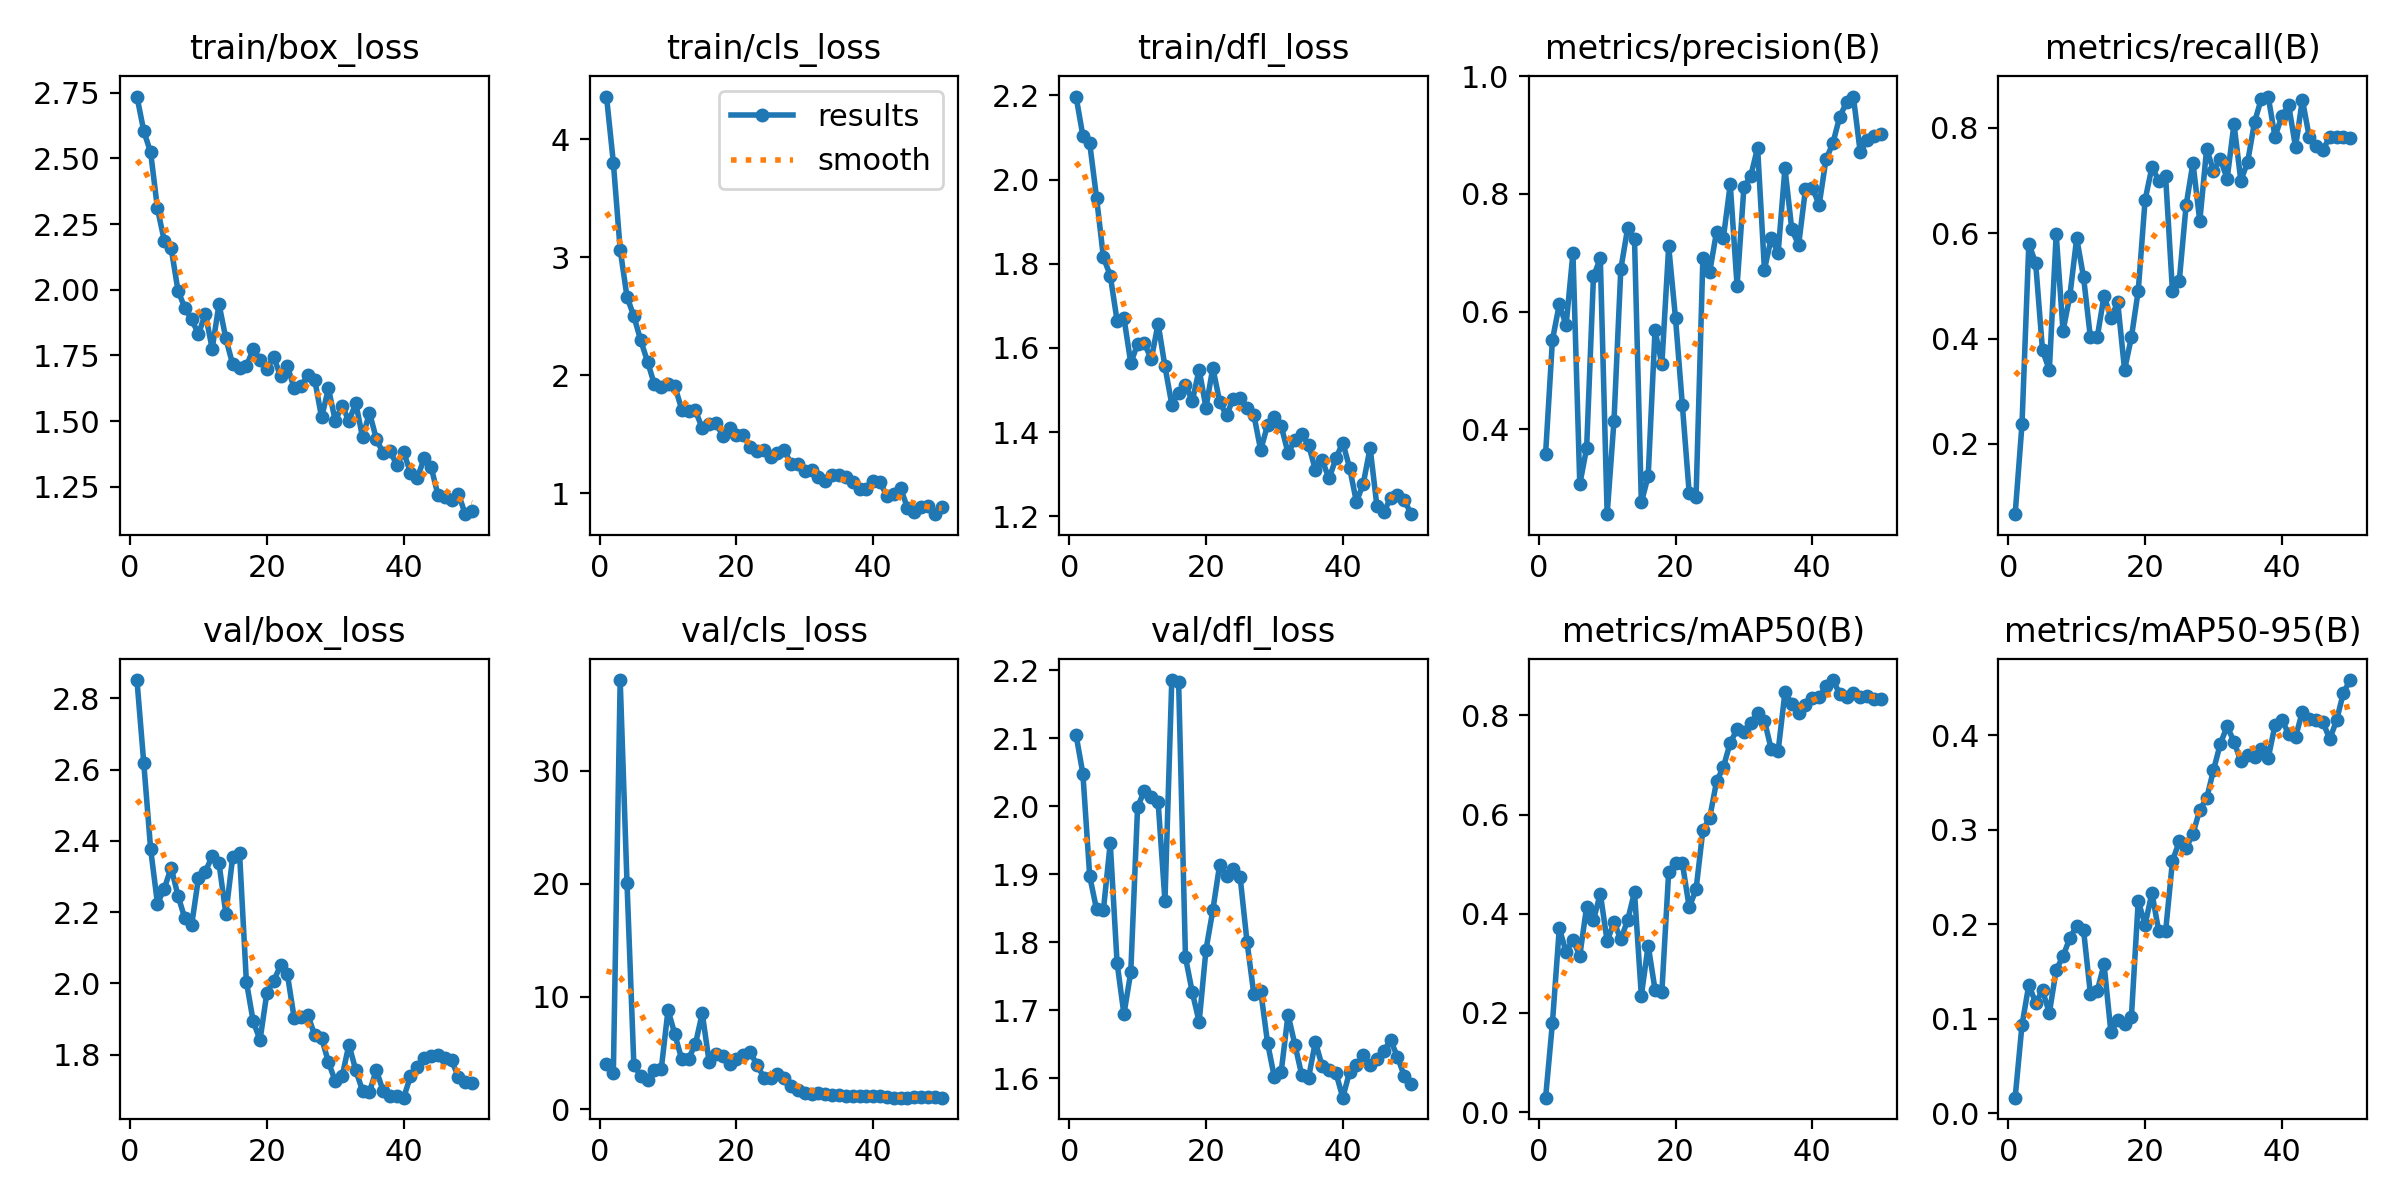

In [27]:
Image(filename='/content/runs/detect/train2/results.png', width=600)

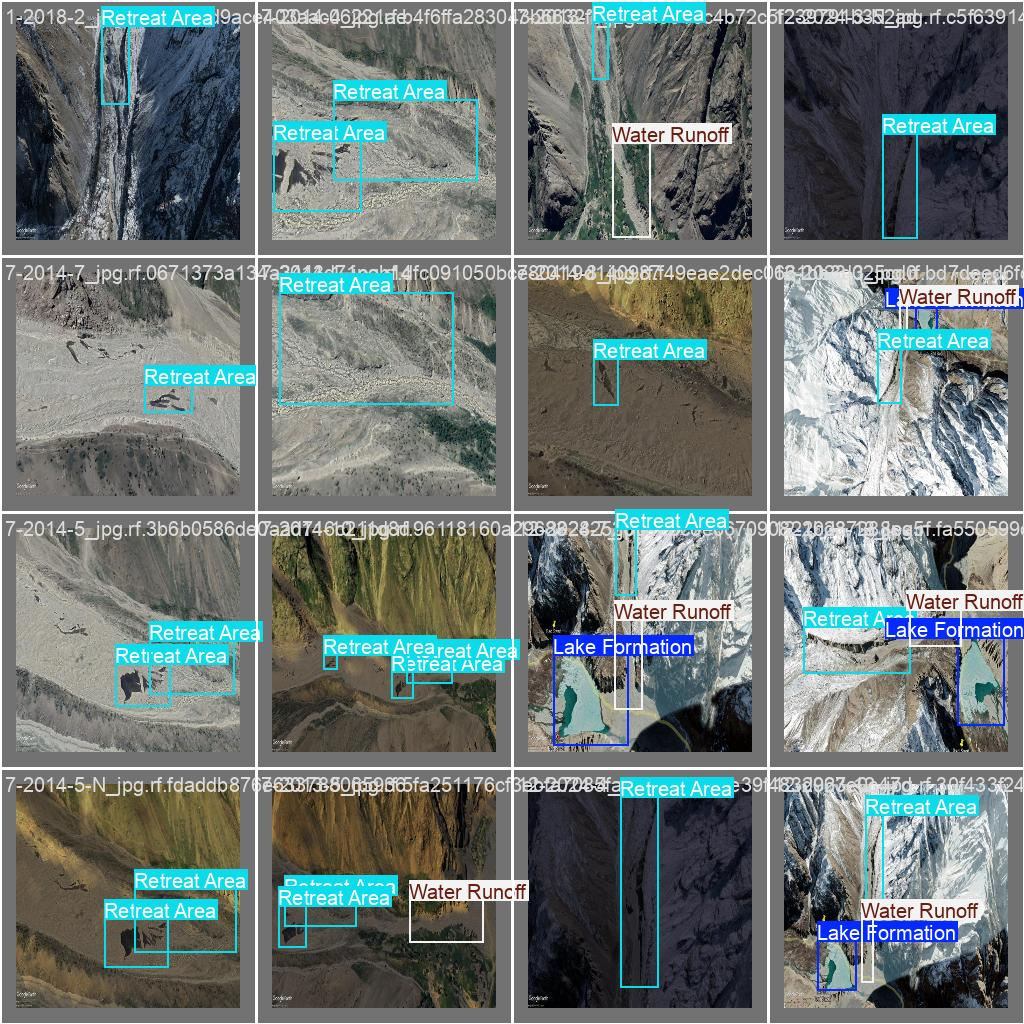

In [32]:
Image(filename='/content/runs/detect/val/val_batch0_labels.jpg', width=700)

In [34]:
from ultralytics import YOLO

# Load the trained model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Validate the model
results = model.val(data='/content/drive/MyDrive/GlacierGuardV8/data.yaml')

# Extract key metrics
precision = results.box.p.mean()  # Mean Precision
recall = results.box.r.mean()     # Mean Recall
map_50 = results.box.map50        # Mean AP@0.5
map_50_95 = results.box.map       # Mean AP@0.5:0.95

# Calculate F1 score
f1_score = 2 * (precision * recall) / (precision + recall)

# Print metrics
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map_50:.3f}")
print(f"mAP@0.5:0.95: {map_50_95:.3f}")
print(f"F1 Score: {f1_score:.3f}")


Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


val: Scanning /content/drive/MyDrive/Glacier-Guard/Glacier Guard.v1i.darknet/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100%|██████████| 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.24s/it]


                   all         21         39      0.903      0.781      0.833      0.459
        Lake Formation          5          5      0.941          1      0.995       0.66
          Retreat Area         21         27          1      0.772      0.914      0.484
          Water Runoff          7          7      0.767      0.571      0.591      0.232
Speed: 0.8ms preprocess, 96.6ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to runs/detect/val11
Precision: 0.903
Recall: 0.781
mAP@0.5: 0.833
mAP@0.5:0.95: 0.459
F1 Score: 0.838


In [35]:
pip install gradio


In [37]:
import gradio as gr
from ultralytics import YOLO
from PIL import Image
import numpy as np

# Load the trained YOLO model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

def predict_and_visualize(image):
    """
    This function processes the input image, applies the YOLO model, and outputs:
    - Processed image with bounding boxes.
    - A textual decision on lake formation.
    """
    # Convert input image (Gradio) to PIL format
    img = Image.fromarray(np.array(image))

    # Run YOLO model inference
    results = model.predict(source=img, save=False)

    # Draw bounding boxes on the input image
    annotated_image = results[0].plot()

    # Check for the class "Lake Formation" in predictions
    lake_formation_detected = False
    for box in results[0].boxes.data:
        cls = int(box[-1])  # Get class index
        if model.names[cls] == "Lake Formation":
            lake_formation_detected = True
            break

    # Decision on lake formation
    decision = "Lake Formation Detected" if lake_formation_detected else "No Lake Formation Detected"

    # Return the annotated image and decision
    return Image.fromarray(annotated_image), decision

# Create Gradio interface
interface = gr.Interface(
    fn=predict_and_visualize,
    inputs=gr.Image(type="numpy", label="Upload an Image"),
    outputs=[
        gr.Image(type="pil", label="Annotated Image"),
        gr.Textbox(label="Lake Formation Detection"),
    ],
    title="AI Powered Glacier Guard",
    description="Upload an image to detect lake formation using the trained YOLOv8 model.",
)

# Launch the GUI
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://985dbb5a12585041b9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
